<a href="https://colab.research.google.com/github/Dalia65/Tumor_Cancer_Prediction_python/blob/main/modelupdate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas                   as pd
import matplotlib.pyplot        as plt
import seaborn                  as sns
from   sklearn                  import preprocessing ,metrics
from   sklearn.model_selection  import train_test_split
from sklearn.metrics            import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model       import LogisticRegression
from sklearn                    import ensemble
from sklearn.naive_bayes        import GaussianNB
from sklearn.ensemble           import VotingClassifier
from sklearn.neighbors          import KNeighborsClassifier
#import joblib

In [ ]:

class preprocess : 
    def preprocessingg(self,file):
      
      df=pd.read_csv(file)
      df=df.dropna()
      print("Null Values Are:    ")
      print(df.isnull().sum())
      print("Duplicated Values Are:    ")
      print (df.duplicated())
      df["diagnosis"] = df["diagnosis"].map({"B": 0, "M": 1})
      corr= df.corr()
      print("The Correlation Between Features are:    ")
      print(df.corr())
      #representation of data and grouping 
      fig, ax = plt.subplots(figsize=(12, 10))
      sns.heatmap(df.corr(), ax=ax)
      print(df.groupby('diagnosis').size())
      sns.countplot(df['diagnosis'],label="Count")
      plt.show()
      return df
#FEATURE SELECTIONN

    def dtraininput(self,df):
        x = df.drop(columns=['diagnosis','Index'])
        return x
        #x=f1 to f30
    def dtrainoutput(self,df):
        y = df['diagnosis']
        return y
        #y=diagnosis
    

In [ ]:
class Classification: 
    def secoundmodel(self,x_train,y_train):
      knn = KNeighborsClassifier(n_neighbors=7)
      knn.fit(x_train, y_train) 
      return knn   
    def thirdmodel(self,x_train,y_train):
      llf = LogisticRegression()
      llf.fit(x_train,y_train)
      return llf
    def bounsmodel2(self,x_train,y_train):
      gnb = GaussianNB()
      gnb.fit(x_train, y_train)
      return gnb
    

In [ ]:
class Evaluation: 
    def tmodel(self,x_test,y_test,model):
       y_pred= model.predict(x_test)
       accuracy = accuracy_score(y_test,y_pred)  
       return accuracy

In [ ]:
class Input:
     def input(self , infile,model):
        indf=pd.read_csv(infile)
        mydata = indf.drop(columns=['diagnosis','Index'])
        y_pred= model.predict(mydata)
        return mydata,y_pred

Null Values Are:    
Index        0
F1           0
F2           0
F3           0
F4           0
F5           0
F6           0
F7           0
F8           0
F9           0
F10          0
F11          0
F12          0
F13          0
F14          0
F15          0
F16          0
F17          0
F18          0
F19          0
F20          0
F21          0
F22          0
F23          0
F24          0
F25          0
F26          0
F27          0
F28          0
F29          0
F30          0
diagnosis    0
dtype: int64
Duplicated Values Are:    
0      False
1      False
2      False
3      False
4      False
       ...  
450    False
451    False
452    False
453    False
454    False
Length: 455, dtype: bool
The Correlation Between Features are:    
              Index        F1        F2        F3        F4        F5  \
Index      1.000000  0.067100  0.074453  0.087485  0.077638 -0.025207   
F1         0.067100  1.000000  0.337090  0.138461  0.367159  0.289116   
F2         0.074453  0.337090 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


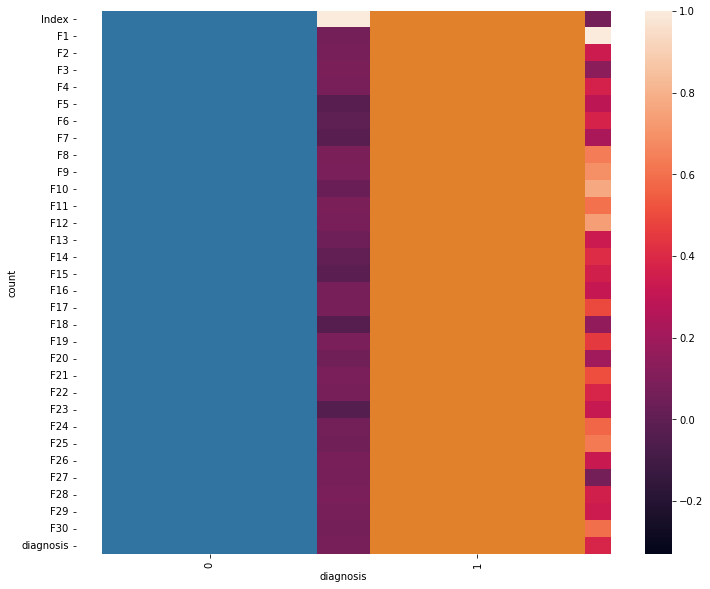

In [ ]:
file=("/content/Tumor Cancer Prediction_Data.csv")
dataframe=preprocess()
df=dataframe.preprocessingg(file)


In [ ]:
x= dataframe.dtraininput(df)
#print(x)
y=dataframe.dtrainoutput(df)
#print(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1, shuffle = True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((341, 30), (114, 30), (341,), (114,))

In [ ]:
classobj=Classification()

llf=classobj.thirdmodel(x_train,y_train)#logistic
knn=classobj.secoundmodel(x_train,y_train)
nbais=classobj.bounsmodel2(x_train,y_train)#naivebias

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
testobj= Evaluation()
KNNacc=testobj.tmodel(x_test,y_test,knn)
logacc=testobj.tmodel(x_test,y_test,llf)
nbacc=testobj.tmodel(x_test,y_test,nbais)

In [ ]:
print ("logistic regression model accuracy is :  ")
print (logacc)
print ("KNN model accuracy is :  ")
print (KNNacc)
print ("Naive Bayes model accuracy is :  ")
print (nbacc)

logistic regression model accuracy is :  
0.9385964912280702
KNN model accuracy is :  
0.9298245614035088
Naive Bayes model accuracy is :  
0.956140350877193


In [ ]:
VotingClassifierModel = VotingClassifier(estimators=[('llf',llf),('knn',knn),('nbais',nbais)], voting='hard')
VotingClassifierModel.fit(x_train,y_train)
myprediction = VotingClassifierModel.predict(x_test)
print (myprediction)

[0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1
 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1
 0 0 1]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
infile="/content/Tumor Cancer Test data.csv"

In [ ]:
inobj=Input()


mydata,naiveprediction=inobj.input(infile,nbais)
mydata,logosticprediction=inobj.input(infile,llf)
mydata,knnprediction=inobj.input(infile,knn)

print(naiveprediction)
print(logosticprediction)
print(knnprediction)





[1 0 0 1 0 0]
[1 0 0 1 0 0]
[1 0 0 1 0 0]


In [ ]:

prediction2 = VotingClassifierModel.predict(mydata)
print('Prediction Of The Enterd Data is : ' ,prediction2)


Prediction Of The Enterd Data is :  [1 0 0 1 0 0]
